# Proyecto. Aprendizaje de Maquina

David Sequera

## Explore Data

### Import Libraries

In [344]:
import numpy as np
import pandas as pd


# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import random
# import datetime


# Export model
import joblib

### Import Data


In [201]:
path = 'data/clean_dataset.csv'

In [202]:
df = pd.read_csv(path)

In [203]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [204]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [357]:
binary = ["Gender", "Married", "BankCustomer", "PriorDefault", "Employed" , "DriversLicense"]
nominal = ["BankCustomer", "Industry", "Ethnicity","Citizen"]
numerical = ["Age"	,"Debt","YearsEmployed","CreditScore","ZipCode","Income"]

In [383]:
for t in (nominal):
    print(f"{t}:",np.unique(df[t]))

BankCustomer: [0 1]
Industry: ['CommunicationServices' 'ConsumerDiscretionary' 'ConsumerStaples'
 'Education' 'Energy' 'Financials' 'Healthcare' 'Industrials'
 'InformationTechnology' 'Materials' 'Real Estate' 'Research' 'Transport'
 'Utilities']
Ethnicity: ['Asian' 'Black' 'Latino' 'Other' 'White']
Citizen: ['ByBirth' 'ByOtherMeans' 'Temporary']


In [205]:
X = df
y = df['Approved']
X = df.drop('Approved', axis=1)
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

X: (690, 15)
y: (690,)


### Visualize Data

<Axes: xlabel='Approved', ylabel='count'>

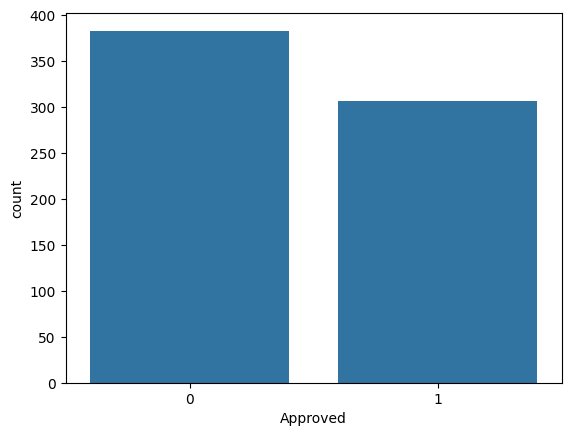

In [206]:
sns.countplot(data=df, x='Approved')

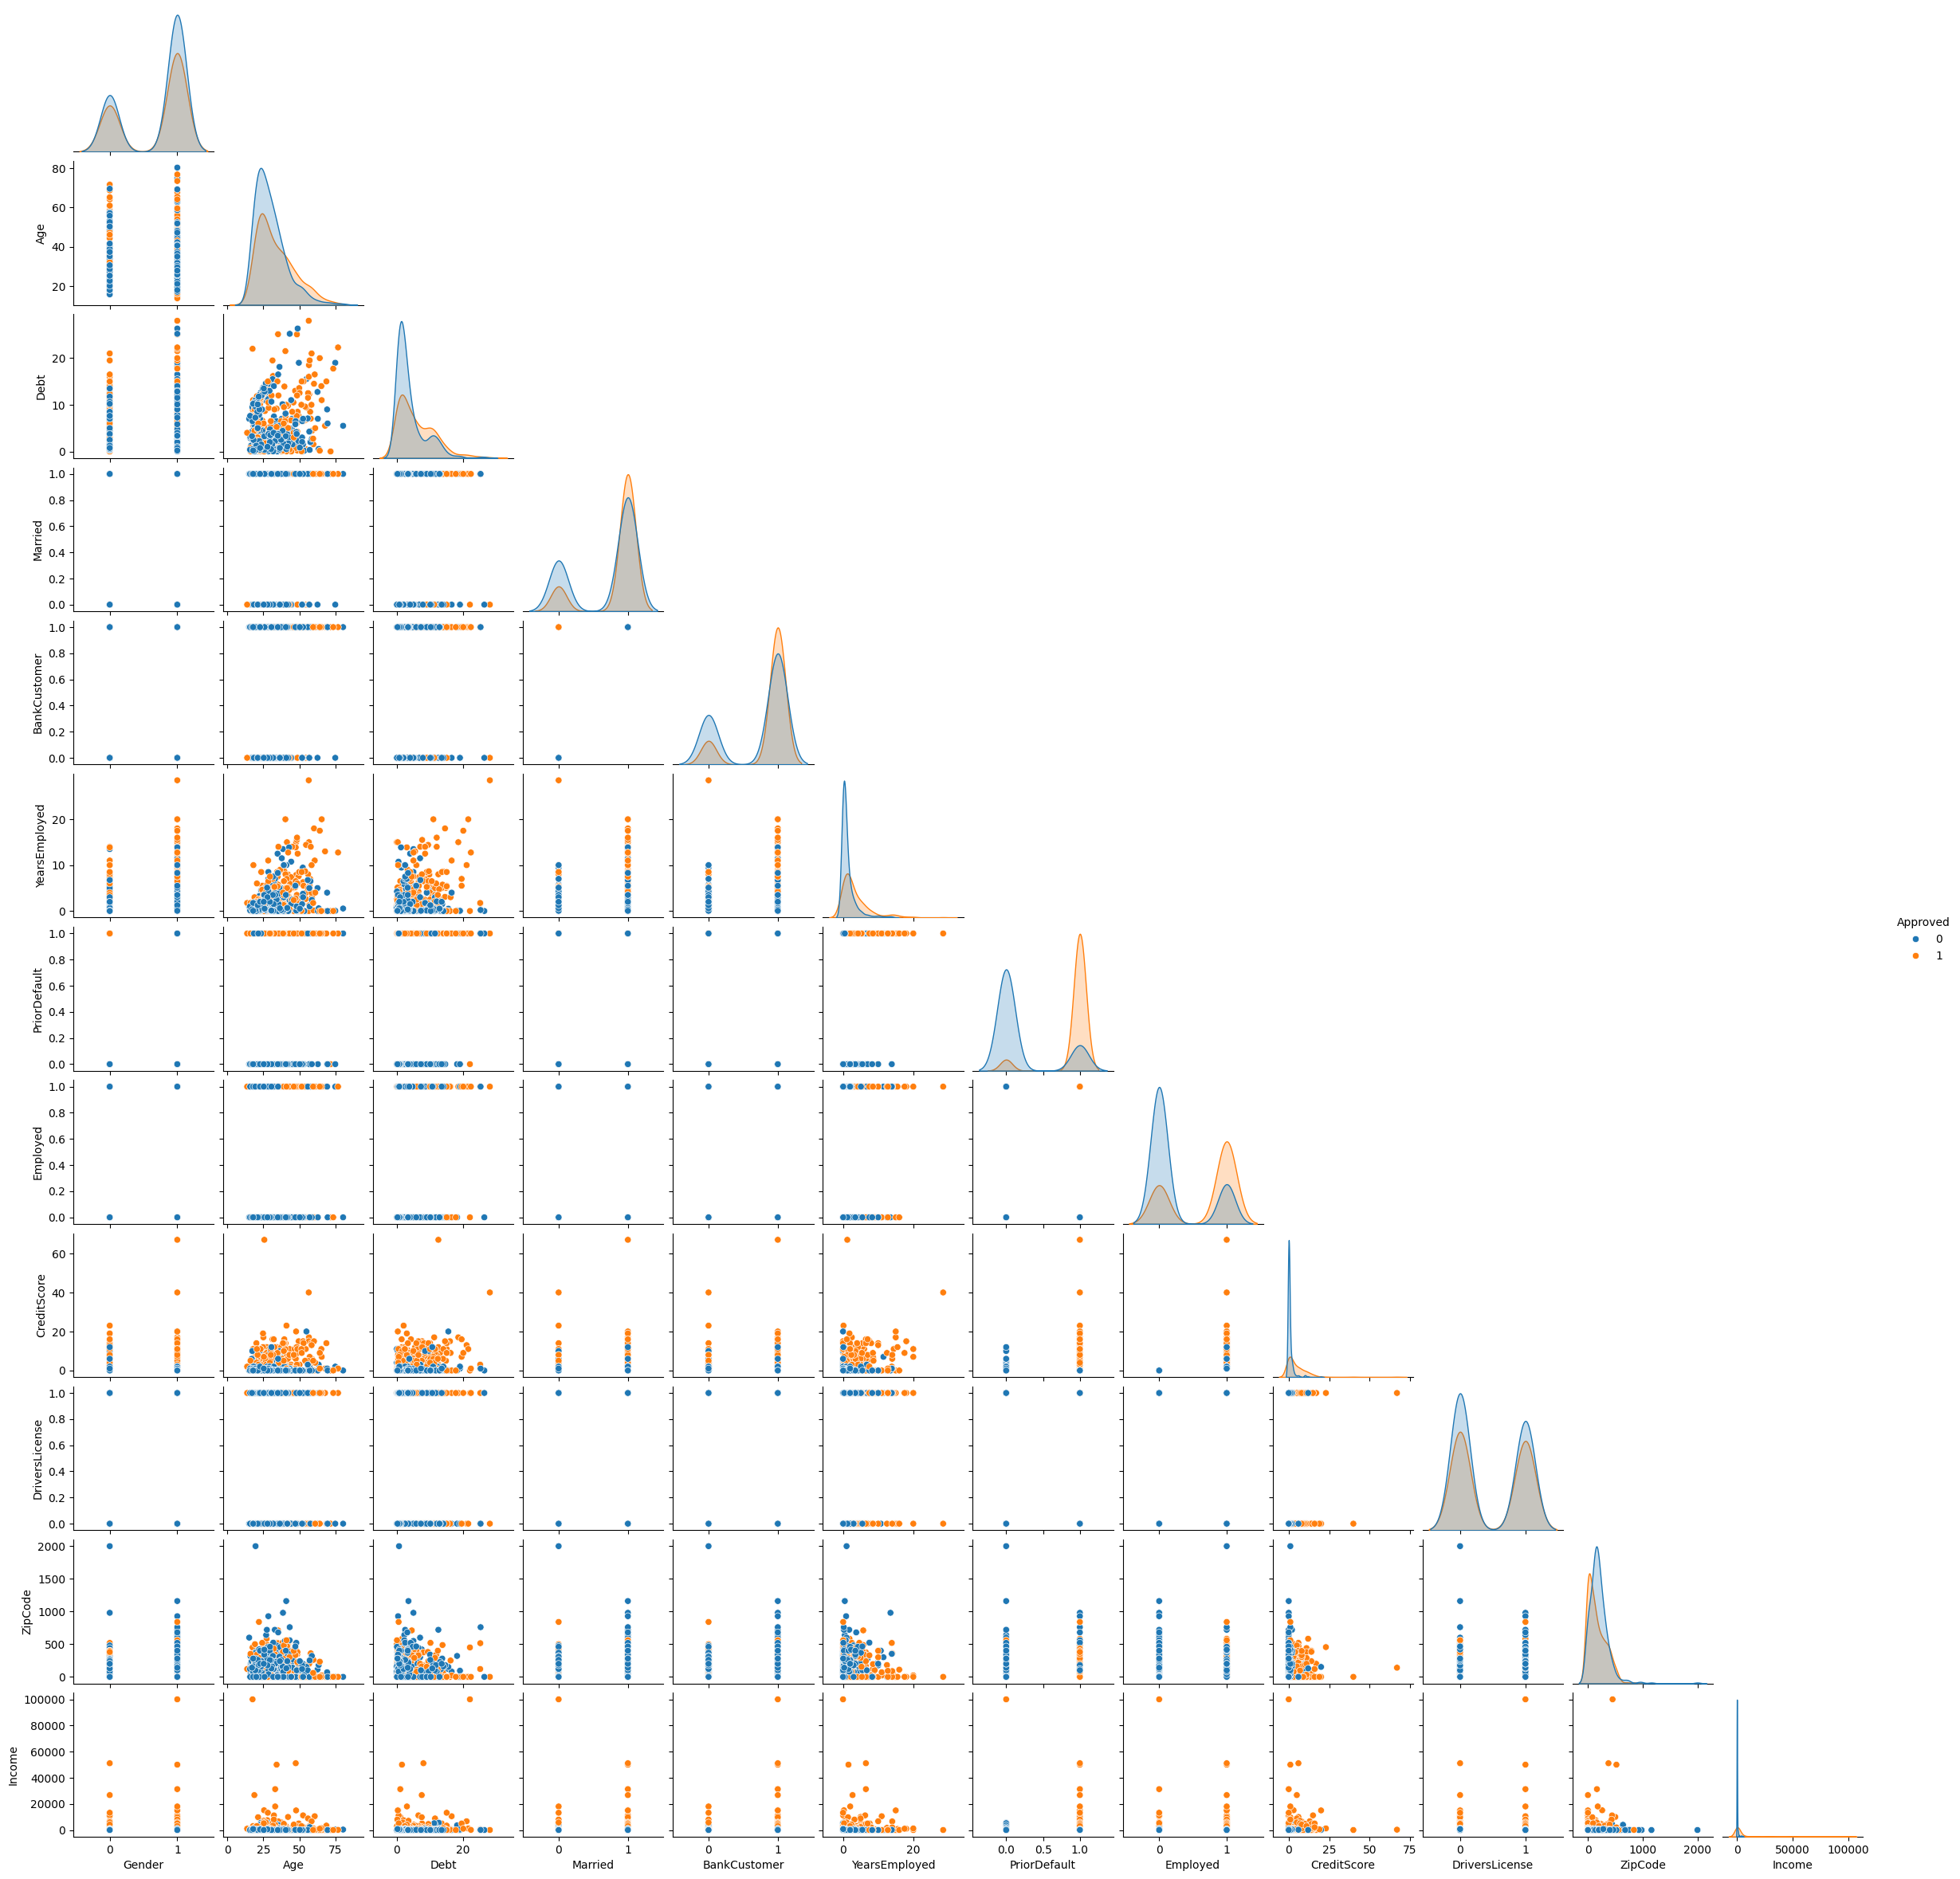

In [207]:
# Visualización de los datos
sns.pairplot(df, hue='Approved', height=2, corner=True)

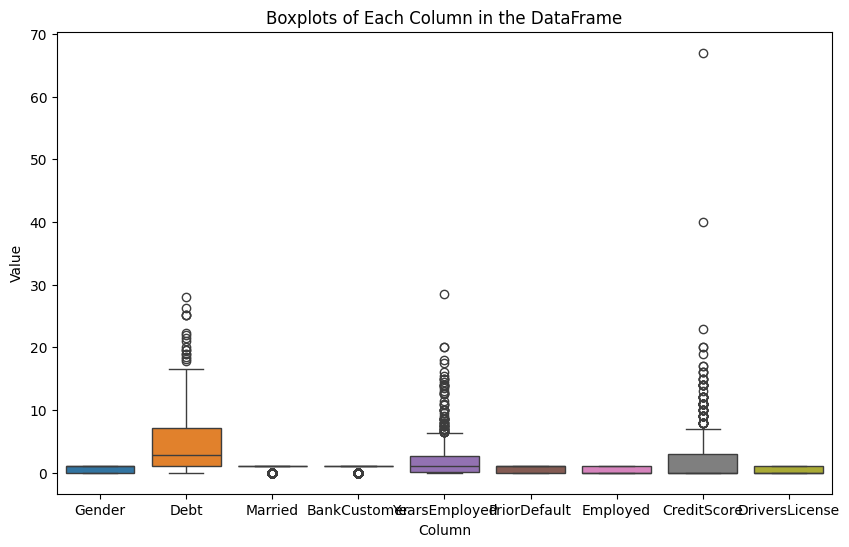

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['Age','Approved', 'Income', 'ZipCode'], axis=1))
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots of Each Column in the DataFrame')
plt.show()

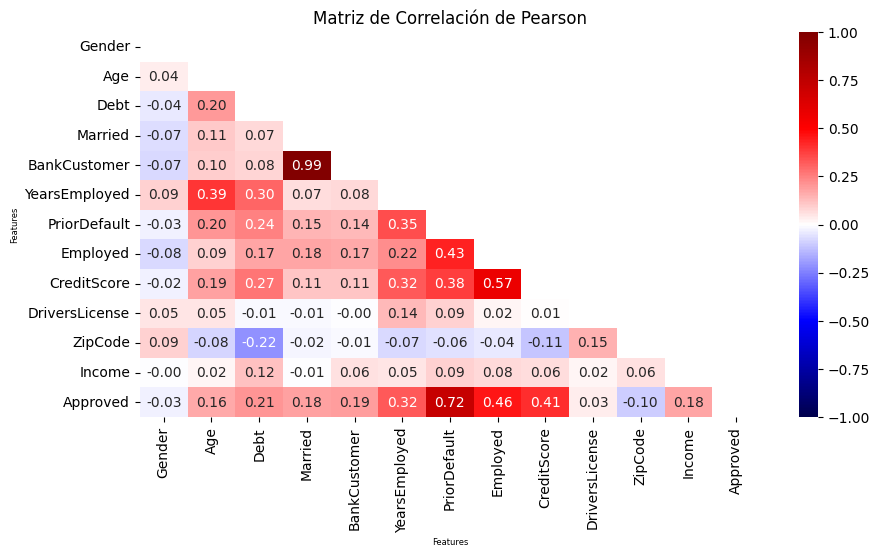

In [209]:
# Get the correlation matrix
corr = df.corr(numeric_only=True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

#  Corner
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap=plt.colormaps['seismic'], fmt=".2f", ax=ax,mask=dropSelf, vmin=-1, vmax=1)

# Add labels
ax.set_xlabel('Features', fontsize=6)
ax.set_ylabel('Features', fontsize=6)

# Rotate tick labels
plt.xticks(rotation=90)
plt.title("Matriz de Correlación de Pearson")
plt.show()

In [245]:
pca_data = train_data = df.drop(['Approved', 'Ethnicity', 'Industry', 'Citizen'], axis=1)
df.drop(['Ethnicity', 'Industry', 'Citizen'], axis=1).head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1


In [246]:
pca = PCA(n_components=4)
embed = pca.fit_transform(pca_data)
print(pca.explained_variance_ratio_)

[9.98882807e-01 1.10988835e-03 5.28481583e-06 1.03955453e-06]


In [212]:
# Calculate the total sum of eigenvalues
total_sum = np.sum(pca.explained_variance_ratio_)

# Calculate the percentage of each principal component
percentages = pca.explained_variance_ratio_ / total_sum * 100

# Print the percentages
for i, percentage in enumerate(percentages):
    print(f"Principal Component {i+1}: {percentage:.4f}%")

print(f'Total sum: {(100*total_sum):.6f}%')

Principal Component 1: 99.8884%
Principal Component 2: 0.1110%
Principal Component 3: 0.0005%
Principal Component 4: 0.0001%
Total sum: 99.999902%


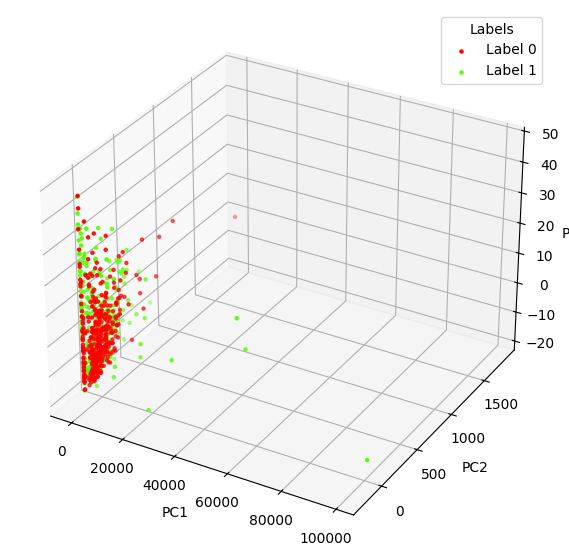

In [213]:
# Define unique labels and colors
unique_labels = np.unique(y)
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# Create a figure and a 3D axis
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each label separately
for label, color in zip(unique_labels, colors):
    indices = y == label
    ax.scatter(embed[indices, 0], embed[indices, 1], embed[indices, 2], 
               c=color.reshape(1, -1), label=f'Label {label}', s=5)

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a legend
ax.legend(title='Labels')

# Show plot
plt.show()

In [214]:
# Assuming embed and y are your data arrays
# embed is a 2D numpy array with shape (n_samples, 3)
# y is a 1D numpy array with shape (n_samples,)

# Define unique labels
unique_labels = np.unique(y)

# Define colors for each label
colors = px.colors.qualitative.Plotly[:len(unique_labels)]

# Create a scatter plot for each label
fig = go.Figure()

for label, color in zip(unique_labels, colors):
    indices = y == label
    fig.add_trace(go.Scatter3d(
        x=embed[indices, 0],
        y=embed[indices, 1],
        z=embed[indices, 2],
        mode='markers',
        marker=dict(size=2, color=color),
        name=f'Label {label}'
    ))

# Update axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title='Labels'
)

# Show plot
fig.show()


## Prepare Data


### Transform Data

In [ ]:
# # Create an instance of the OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the data
# encoded_data = encoder.fit_transform(df[['Color']])

# # Convert the encoded data to a DataFrame
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Color']))

# # Print the encoded DataFrame
# print(encoded_df)

In [280]:
# Dummify the "Industry" column
X_dummified = pd.get_dummies(X, columns=['Industry','Ethnicity', 'Citizen' ])
# Print the dummified DataFrame
print(X_dummified)

     Gender    Age    Debt  Married  BankCustomer  YearsEmployed  \
0         1  30.83   0.000        1             1           1.25   
1         0  58.67   4.460        1             1           3.04   
2         0  24.50   0.500        1             1           1.50   
3         1  27.83   1.540        1             1           3.75   
4         1  20.17   5.625        1             1           1.71   
..      ...    ...     ...      ...           ...            ...   
685       1  21.08  10.085        0             0           1.25   
686       0  22.67   0.750        1             1           2.00   
687       0  25.25  13.500        0             0           2.00   
688       1  17.92   0.205        1             1           0.04   
689       1  35.00   3.375        1             1           8.29   

     PriorDefault  Employed  CreditScore  DriversLicense  ...  \
0               1         1            1               0  ...   
1               1         1            6             

#### Scale Data

In [304]:
scaler = StandardScaler()
scaler.fit(X_dummified)
def transform_data(data):
  # Implement your data transformation logic here
  # Example: Scaling numerical features
  scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)
  return scaled

scaled_data = transform_data(X_dummified)

### Split Data

In [305]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

## Functions

In [306]:
def plot_confusion_matrix(y, y_pred, title='Matriz de Confusión', cmap='Greens'):

    # Visualizar la matriz de confusión utilizando seaborn
    conf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()

In [385]:
def plot_bar_chart(y, y_pred, title="Predictions Vs Real values" ):
    pd.DataFrame({
        "real":(np.count_nonzero(y == 0), np.count_nonzero(y == 1)),
        "prediction":(np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1))},
        index=["0", "1"]).plot(kind="bar",figsize=(12, 5))
    plt.title(title)
    plt.xlabel("Classification")
    plt.ylabel("Count")

In [308]:
def plot_roc_curve(true_y, y_prob, title='ROC Curve'):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, _ = roc_curve(true_y, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr,label="Model AUC = "+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc=4)

In [309]:
def print_classification_report(y, y_pred):
    print(classification_report(y, y_pred))

In [384]:
def plot_features_importance(model,X, title="Model Feature Importance"):
    # Note the sum of all individual importances sum to 1
    # Define our feature names and feature importance lists
    feature_importance = model.feature_importances_

    # Create a dictionary containing our feature importances and the corresponding feature names
    featurePlot = {
        "feature_names": X.columns,
        "feature_importance": feature_importance
    }

    featurePlotData = pd.DataFrame(featurePlot)

    # Sort our feature importances in descending order
    featurePlotData.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Set the size of our figure and the default seaborn blue colour hex code
    plt.figure(figsize=(8,6))

    # Plot our feature importances as a bar chart
    sns.barplot(x=featurePlotData['feature_importance'],y=featurePlotData['feature_names'])

    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.show()

In [337]:
def plot_coef(model, X):
    pd.Series(model.coef_[0], index=X.columns).sort_values().plot(kind='barh')
    plt.title('Coefficients of the Linear Regression Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.figure(figsize=(18,9))
    plt.show()

## Model

### Support Vector Machine

In [312]:
svc = SVC(kernel='rbf', C=1, gamma=1/250, random_state=42)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

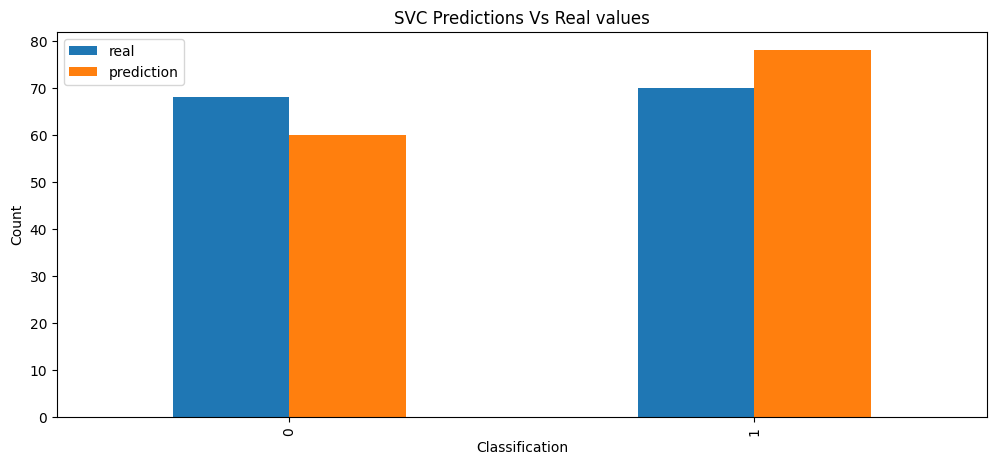

In [386]:
plot_bar_chart(y_test, y_pred_svc, title="SVC Predictions Vs Real values")

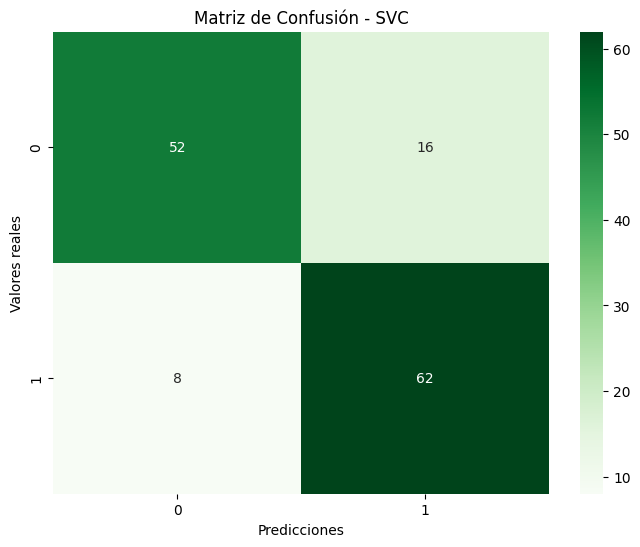

In [314]:
plot_confusion_matrix(y_test, y_pred_svc, title='Matriz de Confusión - SVC')

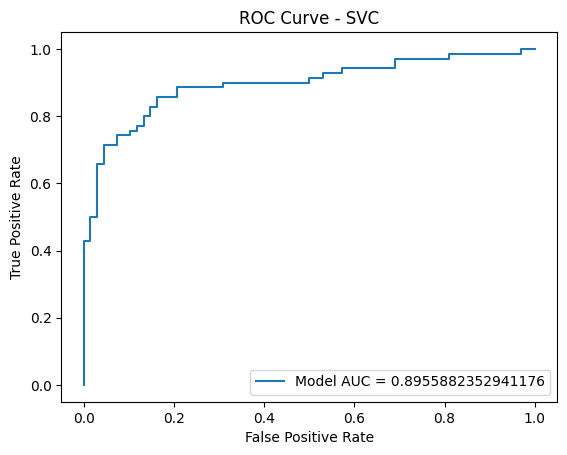

In [315]:
plot_roc_curve(y_test, svc.decision_function(X_test), title='ROC Curve - SVC')

In [316]:
print_classification_report(y_test, y_pred_svc)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        68
           1       0.79      0.89      0.84        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



### AdaBoost

In [317]:
ada = AdaBoostClassifier(n_estimators=80, random_state=0, algorithm='SAMME')
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

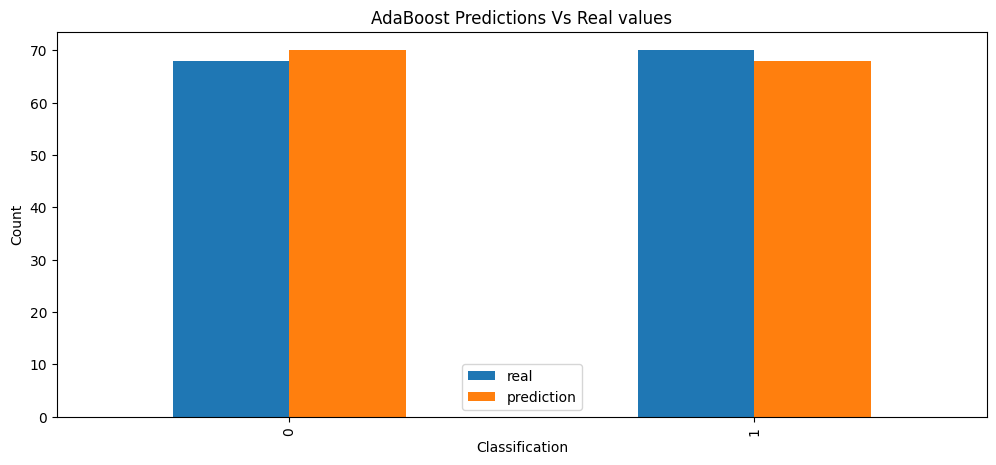

In [388]:
plot_bar_chart(y_test, y_pred_ada, title="AdaBoost Predictions Vs Real values")

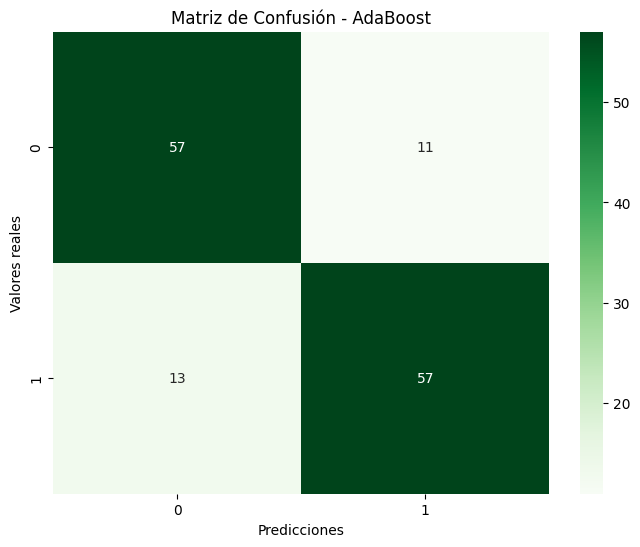

In [319]:
plot_confusion_matrix(y_test, y_pred_ada, title='Matriz de Confusión - AdaBoost')

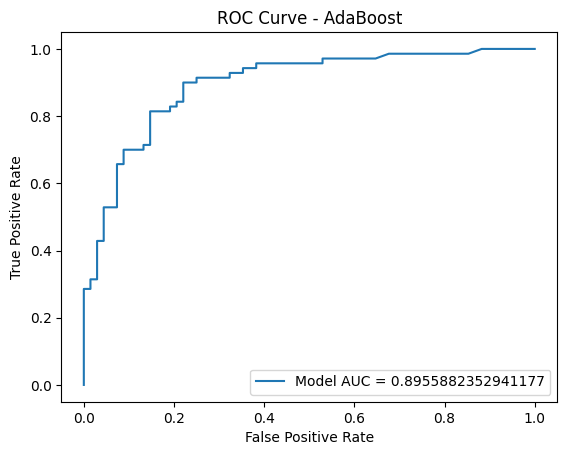

In [320]:
plot_roc_curve(y_test, ada.decision_function(X_test), title='ROC Curve - AdaBoost')

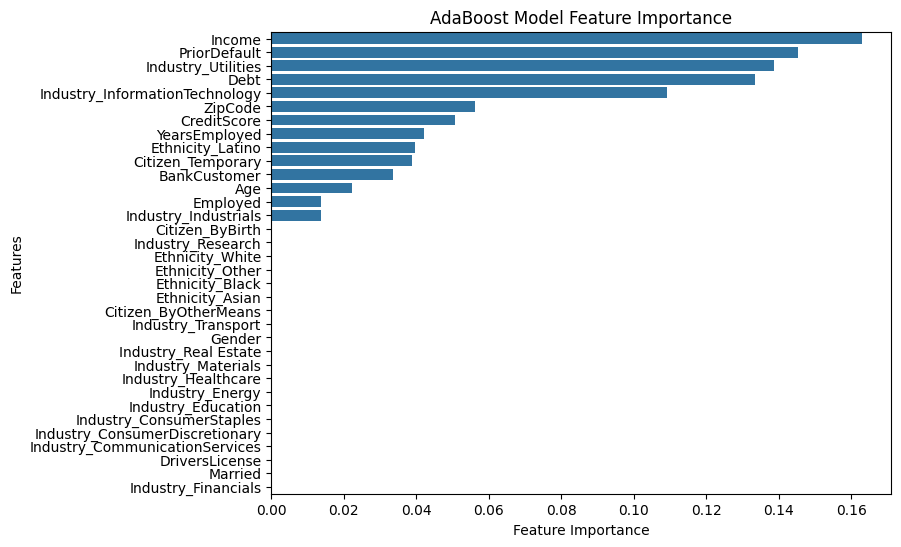

In [338]:
plot_features_importance(ada,X_train, title='AdaBoost Model Feature Importance')

In [322]:
print_classification_report(y_test, y_pred_ada)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        68
           1       0.84      0.81      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



### Logisitc Regression

In [323]:
lr = LogisticRegression(max_iter=1000)
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Predict

In [324]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [390]:
y_pred_lr = lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1], dtype=int64)

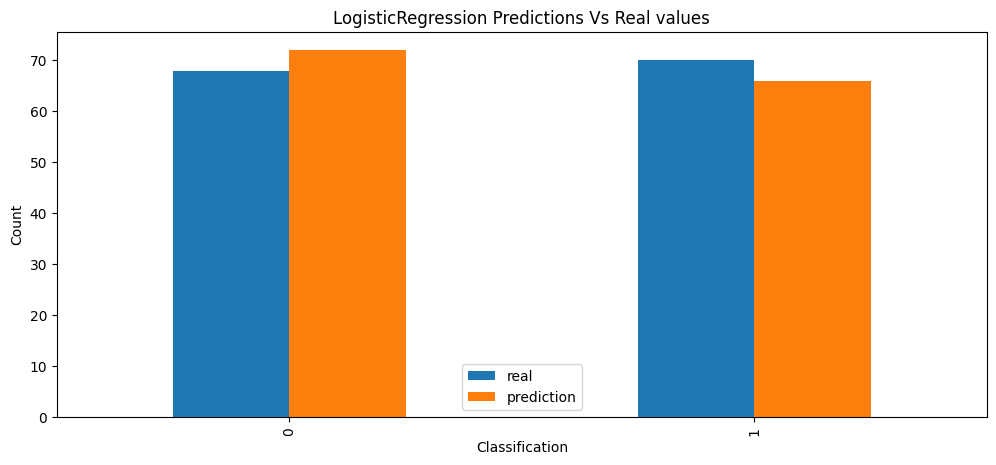

In [393]:
plot_bar_chart(y_test, y_pred_lr, title="LogisticRegression Predictions Vs Real values")

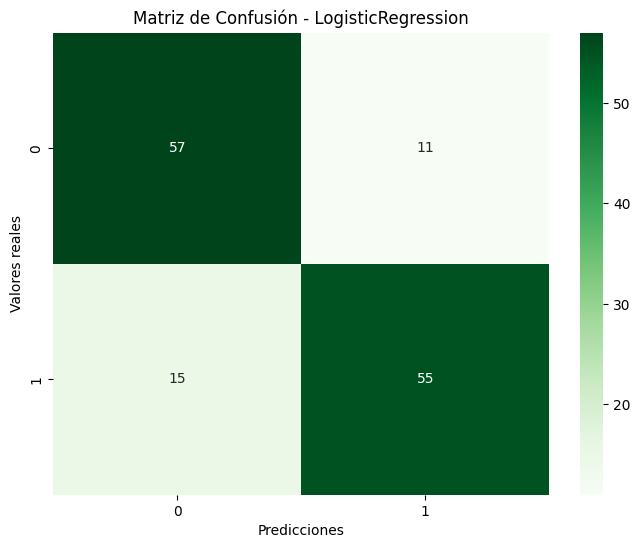

In [392]:
plot_confusion_matrix(y_test, y_pred_lr, title='Matriz de Confusión - LogisticRegression')

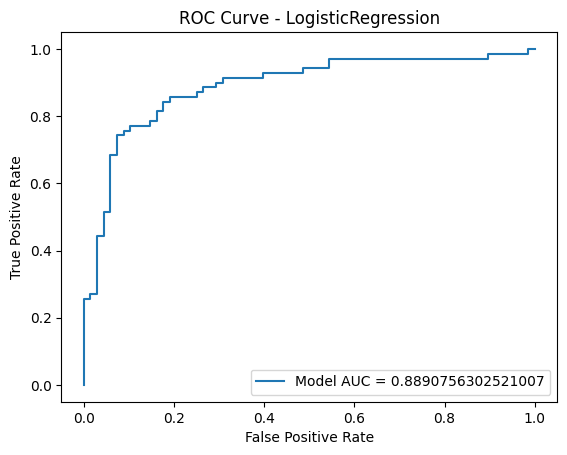

In [394]:
plot_roc_curve(y_test, lr.decision_function(X_test), title='ROC Curve - LogisticRegression')

In [329]:
lr.score(scaled_data, y)

0.8855072463768116

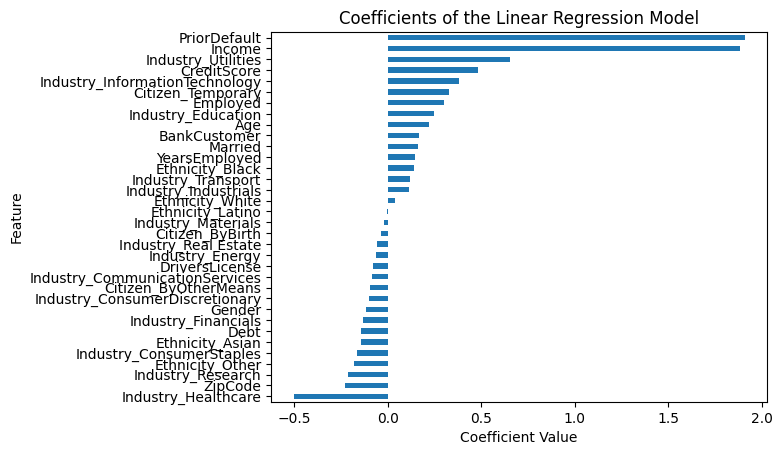

<Figure size 1800x900 with 0 Axes>

In [339]:
plot_coef(lr, X_train)

In [341]:
print_classification_report(y_test, y_pred_lr)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        68
           1       0.83      0.79      0.81        70

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138



### Stepwise

In [340]:
sfs = SequentialFeatureSelector(ada,
                                n_features_to_select=3,
                                direction='forward',
                                scoring='f1',
                                cv=10)
selected_features = sfs.fit(X_train, y_train)

In [ ]:
selected_features.get_feature_names_out()

array(['Gender', 'Married', 'PriorDefault'], dtype=object)

### Model Selection

In [358]:
winner = ada

binary_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),

])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("binary_preprocessor", binary_pipeline, binary),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ada)
])


In [359]:
model = complete_pipeline

## Evaluation

In [360]:
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BankCustomer', 'Industry',
                                                   'Ethnicity', 'Citizen']),
                                                 ('binary_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['Gender', 'Married',
                                                   'BankCustomer',
                                                   'PriorDefault', 'Employed',
                                                   'DriversLicense']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Debt',
                                                   'YearsEmployed',
                                                   'CreditScore', 'ZipCode',
                                                   'Income'])])),
                ('estimator',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=80,
                                    random_state=0))])

In [362]:
y_pred = model.predict(X)

### Metrics

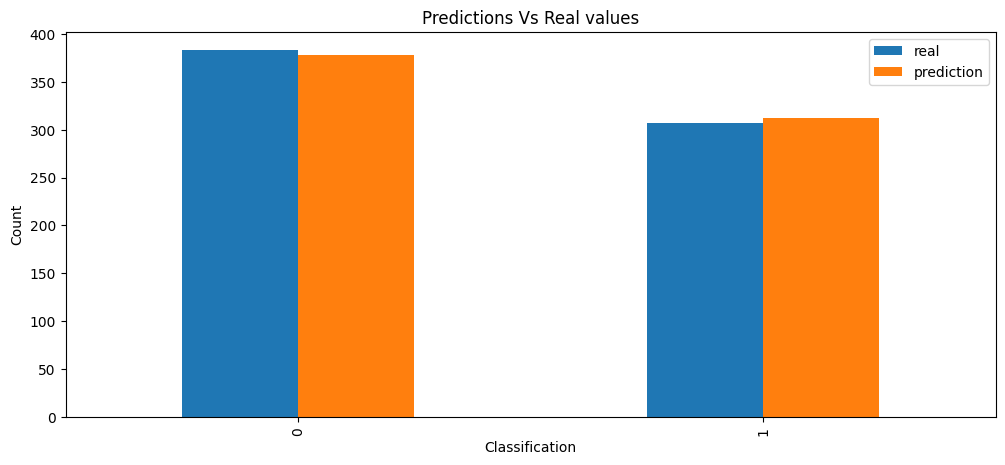

In [363]:
plot_bar_chart(y, y_pred)

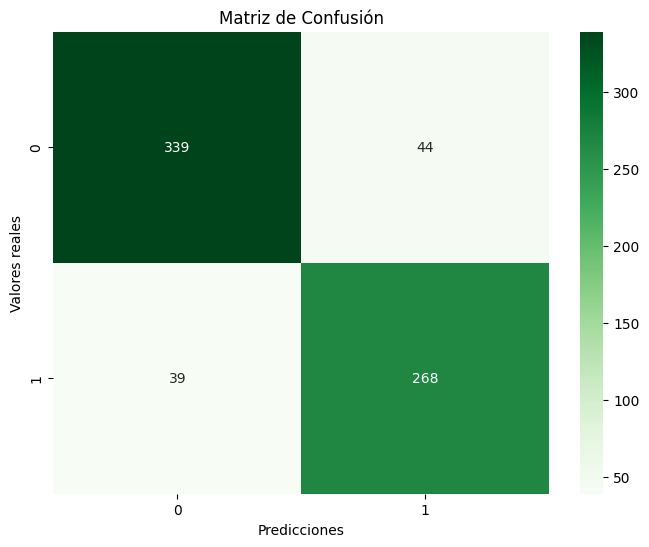

In [365]:
plot_confusion_matrix(y, y_pred)

In [396]:
# plot_roc_curve(y, model.decision_function(X))

In [368]:
auc = roc_auc_score(y, model.decision_function(X))
print(auc)

0.9557751677566954


In [374]:
print_classification_report(y, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       383
           1       0.86      0.87      0.87       307

    accuracy                           0.88       690
   macro avg       0.88      0.88      0.88       690
weighted avg       0.88      0.88      0.88       690



## Export Model

In [375]:
# Export the model
joblib.dump(model, 'models/model.pkl')

['models/model.pkl']

In [376]:
# import sklearn.externals.joblib as skljoblib

# Load the model
imodel = joblib.load('models/model.pkl')

In [378]:
y_imodel = imodel.predict(X)

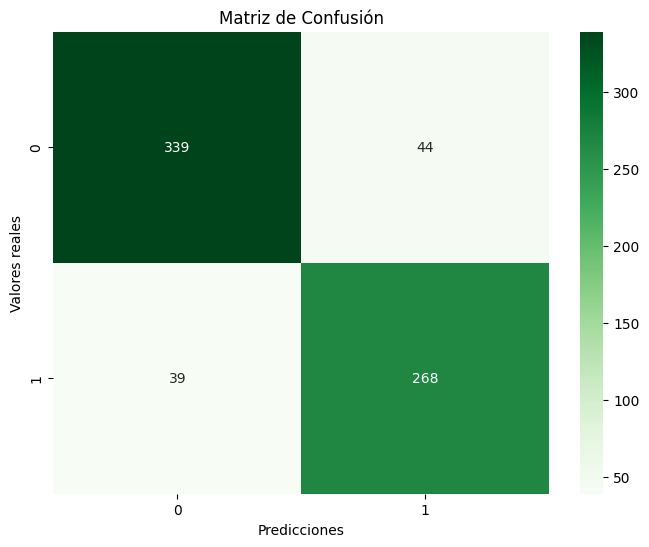

In [379]:
plot_confusion_matrix(y, y_imodel)